In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch


In [82]:
train = pd.read_csv('./sign_mnist_train.csv')
test = pd.read_csv('./sign_mnist_test.csv')
combined_dataset = pd.concat([train, test], ignore_index=True)

In [83]:
print(combined_dataset.head())
combined_dataset.shape

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

(34627, 785)

In [84]:
labels = combined_dataset['label'].values
unique_val = np.array(labels)
print("Classes: ",np.unique(unique_val))

Classes:  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [85]:
combined_dataset.drop('label', axis = 1, inplace = True)
images = combined_dataset.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [86]:
# from sklearn.preprocessing import LabelBinarizer
# label_binrizer = LabelBinarizer()
# labels = label_binrizer.fit_transform(labels)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=13)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=13)

## out of total data, 70% is for train, 10% for validation and 20% for test

In [104]:
# for (torch.tensor(X_train[i]),y_train[i]) in
# train=
# for i in range(len(X_train)):

# print(train[0])

SyntaxError: invalid syntax (1718021088.py, line 1)

18


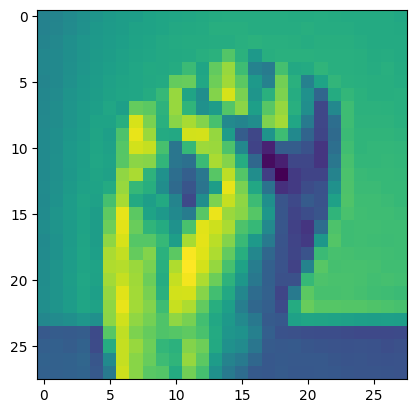

In [88]:
plt.imshow(images[10].reshape(28,28))
print(labels[10])

In [114]:
from torch.utils.data import DataLoader
import torch
from torch.utils.data import sampler

device = torch.device('cpu')

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long) 

from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Create an instance of your custom dataset
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)

# Initialize DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Create an instance of your custom dataset
val_dataset = CustomDataset(X_val_tensor, y_val_tensor)

# Initialize DataLoader
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)


In [125]:

for i,data in enumerate(train_loader):
    # print(data)
    break
print(len(train_dataset[0][0]))

784


In [116]:
def check_accuracy_part34(loader, model):
  if loader.dataset.train:
    print('Checking accuracy on validation set')
  else:
    print('Checking accuracy on test set')
  num_correct = 0
  num_samples = 0
  model.eval()  # set model to evaluation mode
  with torch.no_grad():
    for x, y in loader:
      x = x.to(device=device, dtype=torch.float)  # move to device, e.g. GPU
      y = y.to(device=device, dtype=torch.long)
      scores = model(x)
      _, preds = scores.max(1)
      num_correct += (preds == y).sum()
      num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
  return acc

In [118]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

def train_part34(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.

    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for

    Returns: Accuracy, also prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    acc = 0
    for e in range(epochs):
        for t, (x, y) in enumerate(train_loader):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=torch.float)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % 100 == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                acc = check_accuracy_part34(val_loader, model)
                print()
    return acc

In [120]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

model = None
optimizer = None

################################################################################
# TODO:                                                                        #
# Experiment with any architectures, optimizers, and hyperparameters.          #
# Achieve AT LEAST 70% accuracy on the *validation set* within 10 epochs.      #
#                                                                              #
# Note that you can use the check_accuracy function to evaluate on either      #
# the test set or the validation set, by passing either loader_test or         #
# loader_val as the second argument to check_accuracy. You should not touch    #
# the test set until you have finished your architecture and  hyperparameter   #
# tuning, and only run the test set once at the end to report a final value.   #
################################################################################
# Replace "pass" statement with your code

class Single(nn.Module):
    def __init__(self, input_p, planes):
        super(Single, self).__init__()
        #convolution and batchNorm 1
        self.conv_1 = nn.Conv2d(input_p, planes, 3, padding = 1)
        self.batch_norm_1 = nn.BatchNorm2d(planes)

        #convolution and batchNorm2
        self.conv_2 = nn.Conv2d(planes, planes, 3, padding = 1)
        self.batch_norm_2 = nn.BatchNorm2d(planes)

        self.short = nn.Sequential()
        if (input_p != planes):
            self.short = nn.Sequential(nn.Conv2d(input_p, planes, 3, padding = 1), nn.BatchNorm2d(planes))

    def forward(self, x):
        output = self.conv_1(x)
        output = self.batch_norm_1(output)
        # output = F.relu(output)
        output = F.leaky_relu(output)
        output = self.conv_2(output)
        output = self.batch_norm_2(output)
        output = output + self.short(x)
        # output = F.relu(output)
        output = F.leaky_relu(output)
        return output

class model_design(nn.Module):
    def __init__(self, input_l, hidden_l, no_of_class):
        super(model_design, self).__init__()

        #convolution and batchNorm
        self.conv = nn.Conv2d(input_l, hidden_l[0], 3, padding = 1)
        self.batch_norm = nn.BatchNorm2d(hidden_l[0])

        self.resnet_1 = Single(hidden_l[0], hidden_l[1])
        self.resnet_2 = Single(hidden_l[1], hidden_l[2])

        #pooling
        self.pool = nn.MaxPool2d(2, 2)
        # self.pool = nn.AvgPool2d(2, 2)


        self.fc = nn.Linear(hidden_l[2] * 16 * 16 , no_of_class)

    def forward(self, x):
        output = self.conv(x)
        output = self.batch_norm(output)
        # output = F.relu(output)
        output = F.leaky_relu(output)

        output = self.resnet_1(output)
        output = self.resnet_2(output)
        output = self.pool(output)
        output = self.fc(flatten(output))
        return output

hidden_layers=[16, 32, 64]
model=model_design(3, hidden_layers, 10)
# model=model.to('cuda')
# optimizer = optim.Adagrad(model.parameters(), lr = 1e-3, weight_decay = 1e-4)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)
#optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)



# END OF YOUR CODE

# You should get at least 70% accuracy
train_part34(model, optimizer, epochs=10)

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [32, 784]

Now we Train the model